# Contact Graph Generator

In [1]:
import logging
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.search_algorithm import ReexploreLevel
from large_gcs.algorithms.gcs_astar import GcsAstar
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_under,
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)
from large_gcs.cost_estimators.shortcut_edge_ce import ShortcutEdgeCE

import numpy as np
from copy import deepcopy
from IPython.display import HTML


np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
logging.basicConfig(level=logging.INFO)
# logging.getLogger().setLevel(logging.INFO)
logging.getLogger("drake").setLevel(logging.WARNING)

## Simple Demo 2

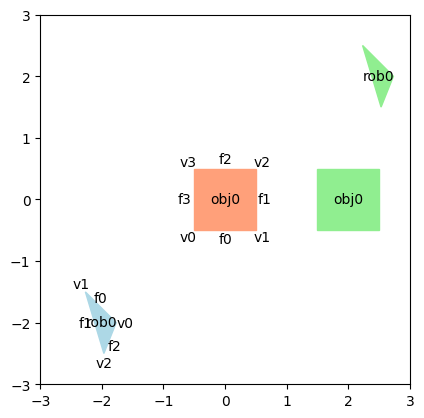

In [2]:
ws = 3
params = ContactGraphGeneratorParams(
    name="cg_simple_2",
    obs_vertices=[],
    obj_vertices=[np.array([[0, 0], [1, 0], [1, 1], [0, 1]]) + np.array([2.5, 0.5])],
    rob_vertices=[np.array([[-1, -1], [-1.5, -0.5], [-1.2, -1.5]])],
    source_obj_pos=[[0, 0]],
    source_rob_pos=[[-2, -2]],
    target_obj_pos=[[2, 0]],
    target_rob_pos=[[2.5, 2]],
    n_pos_per_set=2,
    workspace=[[-ws, ws], [-ws, ws]],
)
generator = ContactGraphGenerator(params)
generator.plot()

In [3]:
generator.generate()

INFO:large_gcs.graph.contact_graph:Generating contact sets for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 1 body pairs...
100%|██████████| 1/1 [00:00<00:00, 25.97it/s]
INFO:large_gcs.graph.contact_graph:Each body pair has on average 14.0 modes
INFO:large_gcs.graph.contact_graph:Generating contact sets for 14 sets...
100%|██████████| 14/14 [00:00<00:00, 56.00it/s]
INFO:large_gcs.graph.contact_graph:Pruning empty sets...
100%|██████████| 14/14 [00:00<00:00, 104.56it/s]
INFO:large_gcs.graph.contact_graph:14 sets remain after removing 0 empty sets
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 16/16 [00:00<00:00, 4889.89it/s]
INFO:large_gcs.graph.graph:Adding 16 vertices to graph...
100%|██████████| 16/16 [00:00<00:00, 7177.42it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 120/120 [00:02<00:00, 49.25it/s]
INFO:large_gcs.graph.contact_graph:130 edges generated
INFO:large_gcs.graph.con

In [4]:
cg = ContactGraph.load_from_file(params.graph_file_path)

INFO:large_gcs.graph.contact_graph:Loading 14 contact pair modes for 2 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 14 sets...
100%|██████████| 14/14 [00:00<00:00, 67.45it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 16/16 [00:00<00:00, 12030.99it/s]
INFO:large_gcs.graph.graph:Adding 16 vertices to graph...
100%|██████████| 16/16 [00:00<00:00, 12650.12it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 130/130 [00:00<00:00, 8593.26it/s]
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 130/130 [00:00<00:00, 5025.11it/s]
INFO:large_gcs.graph.graph:Adding 130 edges to graph...
100%|██████████| 130/130 [00:00<00:00, 4440.22it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 16), n_vertices=16, n_edges=130, source=[array([0, 0]), array([-2, -2])], target=[array([2, 0]), array([2.500, 2.000])], workspace=array([[-3,  3],
       [-3

In [5]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
gcs_astar = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.FULL,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, should_rexplore: True
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.125, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 3 neighbors (0)
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 3, n_edges_visited: 1, n_vertices_explored: 3, vertex_coverage: 0.188, edge_coverage: 0.0077, time_wall_clock: 0.0479, n_gcs_solves: 3, gcs_solve_time_total: 0.0416, gcs_solve_time_iter_mean: 0.0139, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0.00403, gcs_solve_time_iter_min: 0.011, gcs_solve_time_iter_max: 0.0196, n_vertices_re

In [6]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_under)
gcs_astar = GcsAstar(
    cg,
    cost_estimator=cost_estimator,
    use_convex_relaxation=False,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.125, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 3 neighbors (0)


INFO:large_gcs.algorithms.gcs_astar:
n_vertices_visited: 3, n_edges_visited: 2, n_vertices_explored: 3, vertex_coverage: 0.188, edge_coverage: 0.0154, time_wall_clock: 0.0521, n_gcs_solves: 3, gcs_solve_time_total: 0.0125, gcs_solve_time_iter_mean: 0.00417, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0.00357, gcs_solve_time_iter_min: 0.00162, gcs_solve_time_iter_max: 0.00922, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node ('NC|obj0_f0-rob0_v1',)'s 9 neighbors (8.344288728574407)
INFO:large_gcs.algorithms.gcs_astar:
n_vertices_visited: 4, n_edges_visited: 6, n_vertices_explored: 11, vertex_coverage: 0.25, edge_coverage: 0.0462, time_wall_clock: 0.185, n_gcs_solves: 11, gcs_solve_time_total: 0.0417, gcs_solve_time_iter_mean: 0.00379, gcs_solve_time_last_10_mean: 0.00325, gcs_solve_time_iter_std: 0.00375, gcs_solve_time_iter_min: 0.00132, gcs_solve_time_iter_max: 0.0136, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node ('NC|obj0_f3-ro

In [7]:
sol = cg.solve(use_convex_relaxation=False)
print(sol)

is_success: True, cost: 10.9, time: 29.5, vertex_path: ['source', "('NC|obj0_f3-rob0_v0',)", "('IC|obj0_f3-rob0_v0',)", "('NC|obj0_v3-rob0_f2',)", 'target'], ambient_path: [array([0.000, 0.000, -2.000, -2.000]), array([0.000, 0.000, 0.000, 0.000, -2.000, -0.733, -2.000, -0.500, 0.000,
       0.000, 1.267, 1.500, 1.267, 1.500]), array([0.000, 2.000, 0.000, 0.000, -0.733, 1.267, -0.500, 0.500, 2.000,
       0.000, 2.000, 1.000, 2.000, 1.000, 0.000, 2.000]), array([2.000, 2.000, 0.000, 0.000, 1.267, 2.500, 0.500, 2.000, 0.000,
       0.000, 1.233, 1.500, 1.233, 1.500]), array([2.000, 0.000, 2.500, 2.000])], flows: [-0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.0, 

In [8]:
sol = cg.solve(use_convex_relaxation=True)
print(sol)

is_success: False, cost: 16.9, time: 0.503, vertex_path: [], ambient_path: [], flows: [], result: <pydrake.solvers.MathematicalProgramResult object at 0x1855a0830>


## Triangle Challenge 2

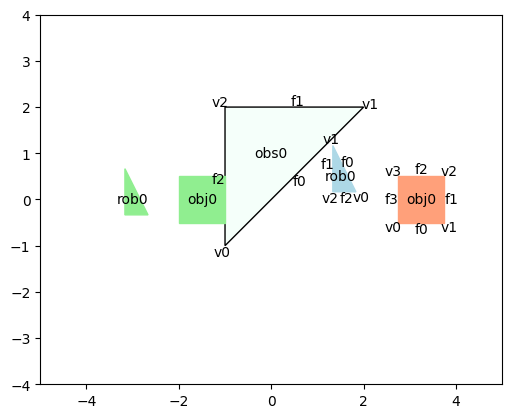

In [9]:
ws_x = 5
ws_y = 4
params = ContactGraphGeneratorParams(
    name="cg_trichal2",
    obs_vertices=[[[-1, 2], [-1, -1], [2, 2]]],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[3.25, 0]],
    source_rob_pos=[[1.5, 0.5]],
    target_obj_pos=[[-1.5, 0]],
    target_rob_pos=[[-3, 0]],
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [10]:
generator.generate()

INFO:large_gcs.graph.contact_graph:Generating contact sets for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 47.99it/s]
INFO:large_gcs.graph.contact_graph:Each body pair has on average 8.333333333333334 modes
INFO:large_gcs.graph.contact_graph:Generating contact sets for 500 sets...
100%|██████████| 500/500 [00:06<00:00, 73.08it/s]
INFO:large_gcs.graph.contact_graph:Pruning empty sets...
100%|██████████| 500/500 [00:03<00:00, 131.44it/s]
INFO:large_gcs.graph.contact_graph:405 sets remain after removing 95 empty sets
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 407/407 [00:00<00:00, 12307.28it/s]
INFO:large_gcs.graph.graph:Adding 407 vertices to graph...
100%|██████████| 407/407 [00:00<00:00, 11878.66it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 82621/82621 [02:26<00:00, 563.03it/s]
INFO:large_gcs.graph.contact_graph:38166 edges 

In [11]:
cg = ContactGraph.load_from_file(params.graph_file_path)

INFO:large_gcs.graph.contact_graph:Loading 25 contact pair modes for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 405 sets...
100%|██████████| 405/405 [00:05<00:00, 71.87it/s]
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 407/407 [00:00<00:00, 12017.22it/s]
INFO:large_gcs.graph.graph:Adding 407 vertices to graph...
100%|██████████| 407/407 [00:00<00:00, 12287.53it/s]
INFO:large_gcs.graph.contact_graph:Creating edge costs...
100%|██████████| 38166/38166 [00:04<00:00, 9018.12it/s] 
INFO:large_gcs.graph.contact_graph:Creating edge constraints...
100%|██████████| 38166/38166 [00:09<00:00, 4143.27it/s]
INFO:large_gcs.graph.graph:Adding 38166 edges to graph...
100%|██████████| 38166/38166 [00:10<00:00, 3756.29it/s]
INFO:large_gcs.graph.contact_graph:Created contact graph: GraphParams(dim_bounds=(4, 18), n_vertices=407, n_edges=38166, source=[array([3.250, 0.000]), array([1.500, 0.500])], target=[array([-1.500, 0.000]), array([-3,  

Just checking that everything works

In [13]:
cost_estimator = ShortcutEdgeCE(cg, shortcut_edge_cost_factory=contact_shortcut_edge_cost_factory_over_obj_weighted)
gcs_astar = GcsAstarConvexRestriction(
    cg,
    cost_estimator=cost_estimator,
    reexplore_level=ReexploreLevel.NONE,
)
sol = gcs_astar.run()

INFO:large_gcs.algorithms.gcs_astar_convex_restriction:Running GcsAstarConvexRestriction, should_rexplore: False
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 2, n_edges_visited: 0, n_vertices_explored: 0, vertex_coverage: 0.0049, edge_coverage: 0, time_wall_clock: 0, n_gcs_solves: 0, gcs_solve_time_total: 0, gcs_solve_time_iter_mean: 0, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 0, gcs_solve_time_iter_min: inf, gcs_solve_time_iter_max: 0, n_vertices_revisited: 0, n_vertices_reexplored: 0
now exploring node source's 2 neighbors (0)
INFO:large_gcs.algorithms.gcs_astar_convex_restriction:
n_vertices_visited: 3, n_edges_visited: 1, n_vertices_explored: 2, vertex_coverage: 0.0074, edge_coverage: 0, time_wall_clock: 0.0351, n_gcs_solves: 2, gcs_solve_time_total: 0.0241, gcs_solve_time_iter_mean: 0.012, gcs_solve_time_last_10_mean: 0, gcs_solve_time_iter_std: 1.16e-05, gcs_solve_time_iter_min: 0.012, gcs_solve_time_iter_max: 0.0121, n_vertices_revi

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>


INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /var/folders/sl/37m0k__51_3_5c5j02w201r40000gn/T/tmp0392hicn/temp.m4v


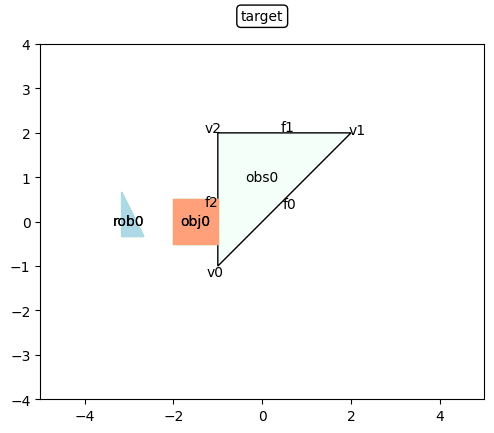

In [16]:
anim = cg.animate_solution()
HTML(anim.to_html5_video())

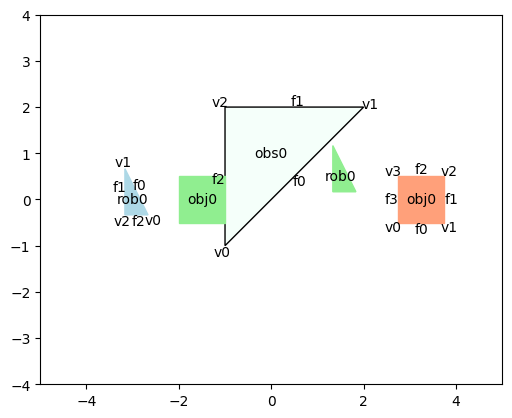

In [2]:
ws_x = 5
ws_y = 4
params = ContactGraphGeneratorParams(
    name="cg_trichal3",
    obs_vertices=[[[-1, 2], [-1, -1], [2, 2]]],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[3.25, 0]],
    source_rob_pos=[[-3, 0]],
    target_obj_pos=[[-1.5, 0]],
    target_rob_pos=[[1.5, 0.5]],
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [3]:
generator.generate()

INFO:large_gcs.graph.contact_graph:Generating contact sets for 3 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 3 body pairs...
100%|██████████| 3/3 [00:00<00:00, 55.27it/s]
INFO:large_gcs.graph.contact_graph:Each body pair has on average 6.666666666666667 modes
INFO:large_gcs.graph.contact_graph:Generating contact sets for 216 sets...
100%|██████████| 216/216 [00:02<00:00, 74.23it/s]
INFO:large_gcs.graph.contact_graph:Pruning empty sets...
100%|██████████| 216/216 [00:01<00:00, 119.93it/s]
INFO:large_gcs.graph.contact_graph:179 sets remain after removing 37 empty sets
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 181/181 [00:00<00:00, 11171.48it/s]
INFO:large_gcs.graph.graph:Adding 181 vertices to graph...
100%|██████████| 181/181 [00:00<00:00, 10313.54it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
100%|██████████| 16290/16290 [00:22<00:00, 711.23it/s]
INFO:large_gcs.graph.contact_graph:6408 edges g

In [ ]:
cg = ContactGraph.load_from_file(params.graph_file_path)

In [ ]:
ws_x = 5
ws_y = 5
params = ContactGraphGeneratorParams(
    name="cg_maze_a1",
    obs_vertices=[
        [[-2, -2.7], [2.2, 2.6], [-1.3, 0.5]],
        [[0.5, -2], [2.7, -1.2], [2.4, 0.3]],
    ],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[3.25, 0]],
    source_rob_pos=[[1.5, 0.6]],
    target_obj_pos=[[-2.3, -0.7]],
    target_rob_pos=[[-0.5, 2]],
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [ ]:
generator.generate()

In [ ]:
cg = ContactGraph.load_from_file(params.graph_file_path)

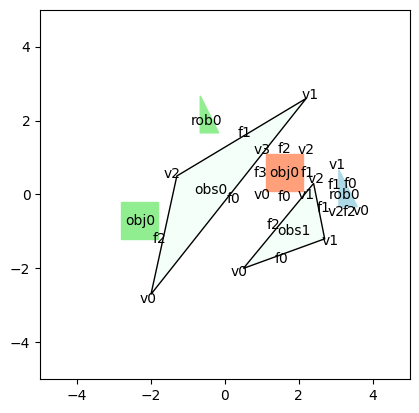

In [21]:
ws_x = 5
ws_y = 5
params = ContactGraphGeneratorParams(
    name="cg_maze_a2",
    obs_vertices=[
        [[-2, -2.7], [2.2, 2.6], [-1.3, 0.5]],
        [[0.5, -2], [2.7, -1.2], [2.4, 0.3]],
    ],
    obj_vertices=[[[1, 0.5], [1, -0.5], [2, -0.5], [2, 0.5]]],
    rob_vertices=[[[3, 1], [3, 0], [3.5, 0]]],
    source_obj_pos=[[1.6, 0.6]],
    source_rob_pos=[[3.25, 0]],
    target_obj_pos=[[-2.3, -0.7]],
    target_rob_pos=[[-0.5, 2]],
    n_pos_per_set=2,
    workspace=[[-ws_x, ws_x], [-ws_y, ws_y]],
)

generator = ContactGraphGenerator(params)
generator.plot()

In [22]:
generator.generate()

INFO:large_gcs.graph.contact_graph:Generating contact sets for 4 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact pair modes for 5 body pairs...
100%|██████████| 5/5 [00:00<00:00, 58.27it/s]
INFO:large_gcs.graph.contact_graph:Each body pair has on average 10.0 modes
INFO:large_gcs.graph.contact_graph:Generating contact sets for 70560 sets...
100%|██████████| 70560/70560 [20:10<00:00, 58.29it/s]
INFO:large_gcs.graph.contact_graph:Pruning empty sets...
100%|██████████| 70560/70560 [09:16<00:00, 126.72it/s]
INFO:large_gcs.graph.contact_graph:11931 sets remain after removing 58629 empty sets
INFO:large_gcs.graph.contact_graph:Creating vertex costs...
100%|██████████| 11933/11933 [00:00<00:00, 13806.72it/s]
INFO:large_gcs.graph.graph:Adding 11933 vertices to graph...
100%|██████████| 11933/11933 [00:00<00:00, 13175.94it/s]
INFO:large_gcs.graph.contact_graph:Generating edges...(parallel)
  0%|          | 268753/71192278 [07:52<34:36:51, 569.16it/s]


KeyboardInterrupt: 

In [ ]:
cg = ContactGraph.load_from_file(params.graph_file_path)